# Práctica 1: Aprendizaje automático

__Fecha de entrega: 13 de marzo de 2022__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

# Apartado 2: Clasificación

Número de grupo: 02

Nombres de los estudiantes: Jesus Martin y Jorge Arevalo

## 1) Carga del conjunto de datos

En este notebook trabajaremos con un conjunto de datos con características de móviles y trataremos de predecir su rango de precio. Las variables del conjunto de datos son las siguientes:

- `battery_power`: Total energy a battery can store in one time measured in mAh
- `blue`: Has bluetooth or not
- `clock_speed`: speed at which microprocessor executes instructions
- `dual_sim`: Has dual sim support or not
- `fc`: Front Camera mega pixels
- `four_g`: Has 4G or not
- `int_memory`: Internal Memory in Gigabytes
- `m_dep`: Mobile Depth in cm
- `mobile_wt`: Weight of mobile phone
- `n_cores`: Number of cores of processor
- `pc`: Primary Camera mega pixels
- `px_height`: Pixel Resolution Height
- `px_width`: Pixel Resolution Width
- `ram`: Random Access Memory in Mega Bytes
- `sc_h`: Screen Height of mobile in cm
- `sc_w`: Screen Width of mobile in cm
- `talk_time`: longest time that a single battery charge will last when you are
- `three_g`: Has 3G or not
- `touch_screen`: Has touch screen or not
- `wifi`: Has wifi or not
- `price_range`: This is the target variable with value of 0 (low cost), 1 (medium cost), 2 (high cost) and 3 (very high cost).

Crea un dataframe a partir del fichero `mobile_phones.csv` que se proporciona junto con la práctica. Como pandas no tiene forma de saber que la variable `price_range` es en realidad categórica, debes indicárselo tú. 

__Nota__: existen otras variables que también son categóricas (como `blue`, `dual_sim`, etc.) pero como sólo pueden tomar dos valores (son booleanas), en nuestro caso no será problamático interpretarlas como números.

## Análisis básico de los datos

In [1]:
import pandas as pd
import math

Usaremos la biblioteca pandas para poder visualizar los datos y la biblioteca math para cambiar alguna variable a categorica

In [2]:
mobiles = pd.read_csv('mobile_phones.csv')
mobiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [3]:
mobiles.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
valores = [-1,0,1,2,3]
categorias = ["low cost", "medium cost", "high cost", "very high cost"]

#la funcion pd.cut se usa para decirle a python que queremos categorizar una variable, en el vector valores tenemos los rangos
#que tendra cada categoria (aunque en este caso no hace falta rangos, ya que los valores son 0, 1, 2 o 3)
#Creamos una nueva columna price con el resultado de categorizar la variable
mobiles['price'] = pd.cut(x=mobiles['price_range'], bins = valores, labels = categorias)
mobiles

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,price
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1,medium cost
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2,high cost
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2,high cost
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2,high cost
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1,medium cost
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1890,668,13,4,19,1,1,0,0,low cost
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,1965,2032,11,10,16,1,1,1,2,high cost
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,1632,3057,9,1,5,1,1,0,3,very high cost
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,670,869,18,10,19,1,1,1,0,low cost


## 2) Análisis de los datos

Comprueba si las clases a predecir están equilibradas y explica cómo afecta tener o no clases equilibradas a la hora de entrenar y evaluar un modelo.

Calcula la correlación de las variables numéricas con la variable `price_range`. ¿Cuáles tienen mayor correlación con la variable de salida? ¿Qué conclusiones puedes extraer?

Comprueba los rangos y distribuciones de las 4 variables numéricas con mayor correlación con la variable `price_range`. Dibuja el diagrama de dispersión entre cada par de variables asignando un color diferente a los puntos que se corresponden con cada una de las 4 categorías a predecir. ¿Hay pares variables que separen bien las clases? 

A tenor de todo el análisis, ¿crees que va a ser un problema sencillo o complicado de resolver?

## Clases equilibradas

<AxesSubplot:ylabel='price'>

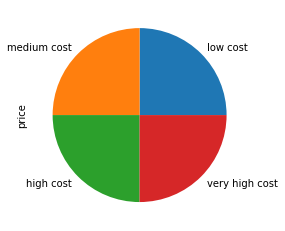

In [5]:
# Podemos dibujar el porcentaje de individuos perteneciente a cada rango de precios
# En este caso los 4 rangos estan equilibrados
mobiles['price'].value_counts().plot.pie()

Si las clases no están equilibradas podemos tener problemas al evaluar nuestra tasa de aciertos, perjudicando a las clases minoritarias, donde tenemos menos datos. Esto sucede, por ejemplo, en el area de la salud, cuando tenemos muy pocos casos positivos de alguna enfermedad. Si le damos un 2% de muestras de un determinado cancer, el algoritmo no podra diferenciar una clase de otra, por lo que siempre respondera que no es cancer, ya que es como obtuvo acierto en un 98% de las veces

## Correlacion con la variable price_range

In [6]:
mobiles_corr = mobiles.corr(method="spearman")
#mobiles_corr
mobiles_corr['price_range']

battery_power    0.199991
blue             0.020573
clock_speed     -0.005436
dual_sim         0.017444
fc               0.024167
four_g           0.014772
int_memory       0.044278
m_dep           -0.000322
mobile_wt       -0.030214
n_cores          0.004651
pc               0.032824
px_height        0.131884
px_width         0.165134
ram              0.917080
sc_h             0.023727
sc_w             0.024776
talk_time        0.022138
three_g          0.023611
touch_screen    -0.030411
wifi             0.018785
price_range      1.000000
Name: price_range, dtype: float64

<AxesSubplot:>

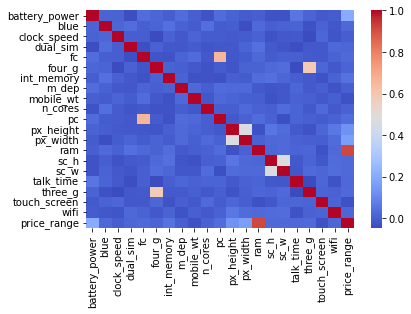

In [7]:
import seaborn as sns

sns.heatmap(mobiles_corr,
           xticklabels=mobiles_corr.columns,
           yticklabels=mobiles_corr.columns,
           cmap='coolwarm')

Hemos obtenido la correlacion entre la variable price_range y todas las demas. Hemos generado tambien un mapa de calor con esta correlacion, donde si miramos la ultima fila podemos ver la correlacion entre price_range y las demas variables.

Obervamos que no hay grandes correlaciones con ninguna variable. Hay 3 con valores entre 0.1 y 0.2 que son  la potencia de la bateria y las pulgadas de la pantalla. Y hay una que destaca por encima de todas las demas que es la ram con una correlacion del 0.91. Asique podemos ver con facilidad que lo que influye mas en el precio de un movil es, con mucha diferencia, la cantidad de ram que lleva instalada

## Rangos y distribuciones de las 4 variables con mayor correlacion con price_range

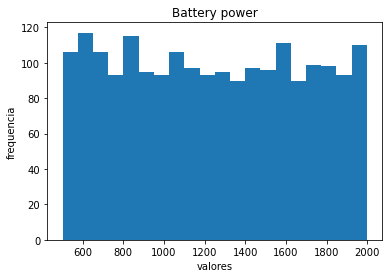

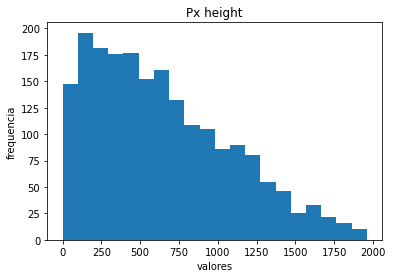

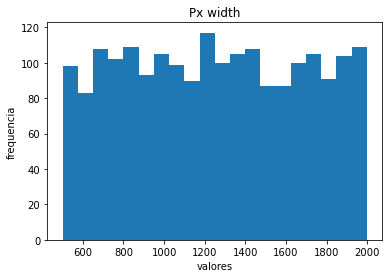

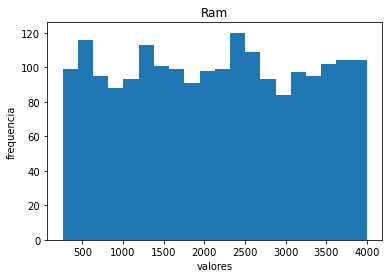

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Graficando histograma de distribución normal.
plt.hist(mobiles['battery_power'], 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Battery power')
plt.show()

# Graficando histograma de distribución normal.
plt.hist(mobiles['px_height'], 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Px height')
plt.show()

# Graficando histograma de distribución normal.
plt.hist(mobiles['px_width'], 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Px width')
plt.show()

# Graficando histograma de distribución normal.
plt.hist(mobiles['ram'], 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Ram')
plt.show()

Text(0.5, 1.0, 'ram vs price range')

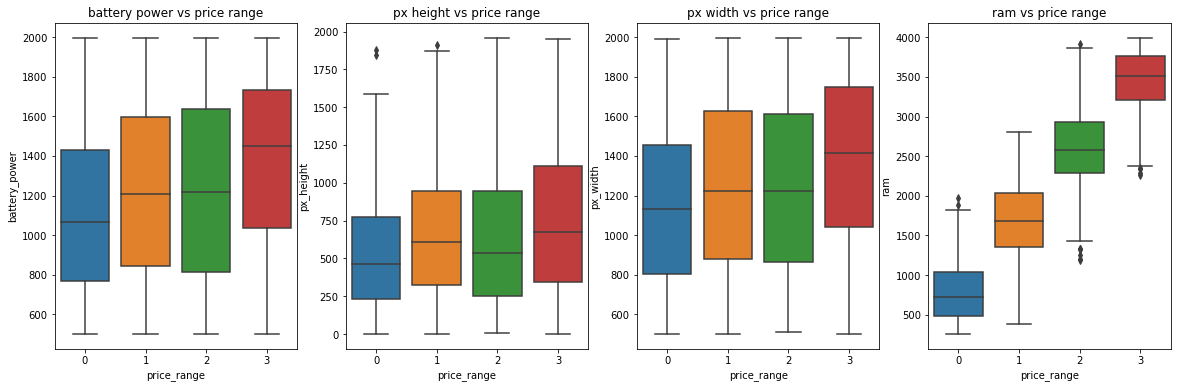

In [9]:
plt.figure(figsize=(20,6))

plt.subplot(1,4,1)
sns.boxplot(x='price_range',y='battery_power',data=mobiles)
plt.title('battery power vs price range')

plt.subplot(1,4,2)
sns.boxplot(x='price_range',y='px_height',data=mobiles)
plt.title('px height vs price range')

plt.subplot(1,4,3)
sns.boxplot(x='price_range',y='px_width',data=mobiles)
plt.title('px width vs price range')

plt.subplot(1,4,4)
sns.boxplot(x='price_range',y='ram',data=mobiles)
plt.title('ram vs price range')

Con estos diagramas podemos volver a comprobar como el aumento de estas 4 variables supone el aumento del precio del movil. Se puede observar como el aumento de la ram supone un aumento inmediato en el aumento del precio, mientras que con las otras 3 es un aumento mas suave y progresivo

## 3) Normalizar los datos

Decide razonadamente si es necesario escalar o estandarizar los datos teniendo en cuenta que vamos a construir un árbol de decisión.

En los arboles de decision no es necesario escalar los datos, ya que los arboles se basan en reglas de tipo "si el valor de la característica x es mayor o igual que y" por lo que nos da igual que las variables aumenten o disminuyan de manera proporcional, nos va a dar los mismos resultados. Una ventaja de usar arboles de decision es que no hace falta escalar los datos. No pasa asi con otros algoritmos como las redes neuronales.

## 4) Optimizando el número mínimo de ejemplos para dividir un nodo

En este apartado vamos a entrenar nuestro clasificador e intentar dar con una parametrización que aprenda "lo justo", sin quedarse corto, ni sobreaprender.

Para ello, probaremos distintos árboles variando el número mínimo de ejemplos para dividir un nodo (parámetro `min_samples_split`) y usando validación cruzada en 10 partes. 

Pinta las curvas de apredizaje para distintos valores de dicho parámetro en entrenamiento y validación. Analiza e interpreta las curvas (¿qué puedes decir de cómo varía el comportamiento de clasificador en entrenamiento y validación a medida que cambia el valor del parámetro?) y decide de manera razonada qué valor del parámetro es el que consideras más adecuado.

Los árboles que vas a entrenar deben utilizar la entropía como criterio de selección de variables.

Como sklearn trabaja con arrays, deberás acceder al array interno del dataframe. Crea un array que contenga sólo los datos de entrenamiento (sin la variable a predecir) y otro array que sólo contenga la variable a predecir. Usaremos __todas__ las variables del dataset para construir el árbol.

In [10]:
from sklearn.model_selection import train_test_split

#Variables predictoras
X = mobiles.iloc[:,0:20]

#Variable a predecir
Y = mobiles.iloc[:,21]


Dividimos nuestros datos en las tablas de testing y training

In [11]:
#X_train y Y_train para entrenamiento
#Y_test y Y_test para prueba
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.75)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 588 to 1168
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1500 non-null   int64  
 1   blue           1500 non-null   int64  
 2   clock_speed    1500 non-null   float64
 3   dual_sim       1500 non-null   int64  
 4   fc             1500 non-null   int64  
 5   four_g         1500 non-null   int64  
 6   int_memory     1500 non-null   int64  
 7   m_dep          1500 non-null   float64
 8   mobile_wt      1500 non-null   int64  
 9   n_cores        1500 non-null   int64  
 10  pc             1500 non-null   int64  
 11  px_height      1500 non-null   int64  
 12  px_width       1500 non-null   int64  
 13  ram            1500 non-null   int64  
 14  sc_h           1500 non-null   int64  
 15  sc_w           1500 non-null   int64  
 16  talk_time      1500 non-null   int64  
 17  three_g        1500 non-null   int64  
 18  touch_

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#Llamamos al constructor del arbol de decision
arbol = DecisionTreeClassifier()

#Entrenamos el modelo
arbol_mobiles = arbol.fit(X_train, Y_train)

# Calculamos la precisión del modelo de entrenamiento y de test
train_accuracy = arbol.score(X_train, Y_train)
test_accuracy = arbol.score(X_test, Y_test)
train_accuracy, test_accuracy

(1.0, 0.84)

In [13]:
# Repetimos el proceso pero modificando los parámetros de aprendizaje del árbol
arbol = DecisionTreeClassifier(criterion="entropy",  # por defecto Gini pero podemos cambiar a entropía
                             max_depth=5,          # profundidad máxima del árbol
                             min_samples_split=5,  # mínimo de muestras en el nodo para seguir dividiéndolo
                             random_state=0)
arbol = arbol.fit(X_train, Y_train)

# Calculamos la precisión del modelo de entrenamiento y de test
train_accuracy = arbol.score(X_train, Y_train)
test_accuracy = arbol.score(X_test, Y_test)
train_accuracy, test_accuracy

(0.8673333333333333, 0.822)

En este caso tenemos un arbol que está menos sobre-ajustado que el anterior porque obtiene igual resultado en test y más bajo en entrenamiento. 

## Curva de aprendizaje según un parámetro del clasificador 

Limitar la profundidad máxima del árbol de decisión puede servir para obtener un clasificador menos "ajustado" a los datos de entrenamiento y, por tanto, que generalice mejor en datos nuevos.
Podemos calcular la profundidad optima usando validación cruzada y probando distintos valores de ese parámetro.

In [14]:
from sklearn.model_selection import cross_validate
import numpy as np

train_accuracy = []
test_accuracy = []

max_depths = range(1, 10)
for md in max_depths: 
    # Entrenar y validar
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=md, min_samples_split=2)
    scores = cross_validate(clf, X, Y, scoring='accuracy', cv=10, return_train_score=True)
    
    train_accuracy.append(np.mean(scores['train_score']))
    test_accuracy.append(np.mean(scores['test_score']))

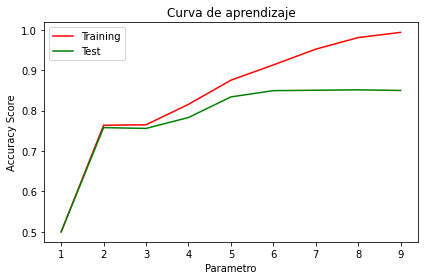

In [15]:
import matplotlib.pyplot as plt

# Draw lines
plt.plot(max_depths, train_accuracy, color="r",  label="Training")
plt.plot(max_depths, test_accuracy, color="g", label="Test")

# Create plot
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show() 

Para max_depth=6 obtenemos el mejor valor de exactitud para el conjunto de prueba. A partir de esa profundidad la métrica mejora para el conjunto de entrenamiento y empeora para el conjunto de prueba indicando que el clasificador está sobre-entrenado y generaliza peor.

Podríamos hacer lo mismo con el resto de parámetros del árbol hasta encontrar lo que funcionan mejor para nuestro conjunto de datos.

Vamos a hacer la misma operacion pero con el parametro min_samples_split

In [19]:
import numpy as np

train_accuracy = []
test_accuracy = []

max_samples_split = range(2, 100)
for msp in max_depths: 
    # Entrenar y validar
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=4, min_samples_split=msp)
    scores = cross_validate(clf, X, Y, scoring='accuracy', cv=10, return_train_score=True)
    
    train_accuracy.append(np.mean(scores['train_score']))
    test_accuracy.append(np.mean(scores['test_score']))

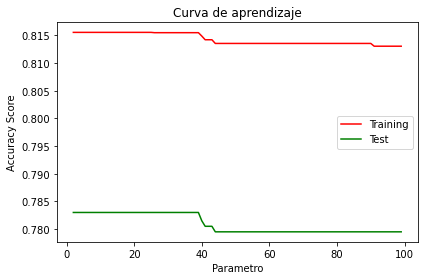

In [20]:
import matplotlib.pyplot as plt

# Draw lines
plt.plot(max_depths, train_accuracy, color="r",  label="Training")
plt.plot(max_depths, test_accuracy, color="g", label="Test")

# Create plot
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Observamos que variar el parametro min_samples_split no afecta para obtener un mejor conjunto de test, ya que las dos curvas se comportan igual, al contrario que en el ejemplo anterior con max_depth

## 5) Analizando el árbol de decisión

Crea un nuevo árbol de decisión con el parámetro elegido en el apartado anterior y dibújalo (si es muy profundo dibuja solamente los primeros niveles). 

Obtén también la importancia de las variables, que es una agregación de su poder discriminante en los distintos nodos del árbol donde se usan (más info [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_)) y píntala en una gráfica.

Con esos gráficos, contesta lo siguiente:

- ¿Cuáles son las variables más importantes y en qué orden? 
- ¿Hay variables del conjunto de datos que no se han usado? 
- ¿Cuál sería la tasa de aciertos (_accuracy_) del árbol sobre el conjunto de entrenamiento si sólo hiciera una pregunta? 
- ¿El árbol que has calculado es capaz de separar las clases? 
- Si no has mostrado el árbol completo, en la parte que estás viendo, ¿qué clases se separan mejor o peor? ¿qué variables ayudan a discriminarlas?
- ¿En cuál de los nodos del segundo nivel del árbol existe mayor confusión (siendo la raíz el nivel 0)?

__Nota__: al dibujar el árbol con la función `plot_tree` el parámetro `class_names` espera recibir una serie de datos de tipo cadena. Puedes convertir la serie de categorías a una serie de cadenas usando `mi_serie.astype('str')`.

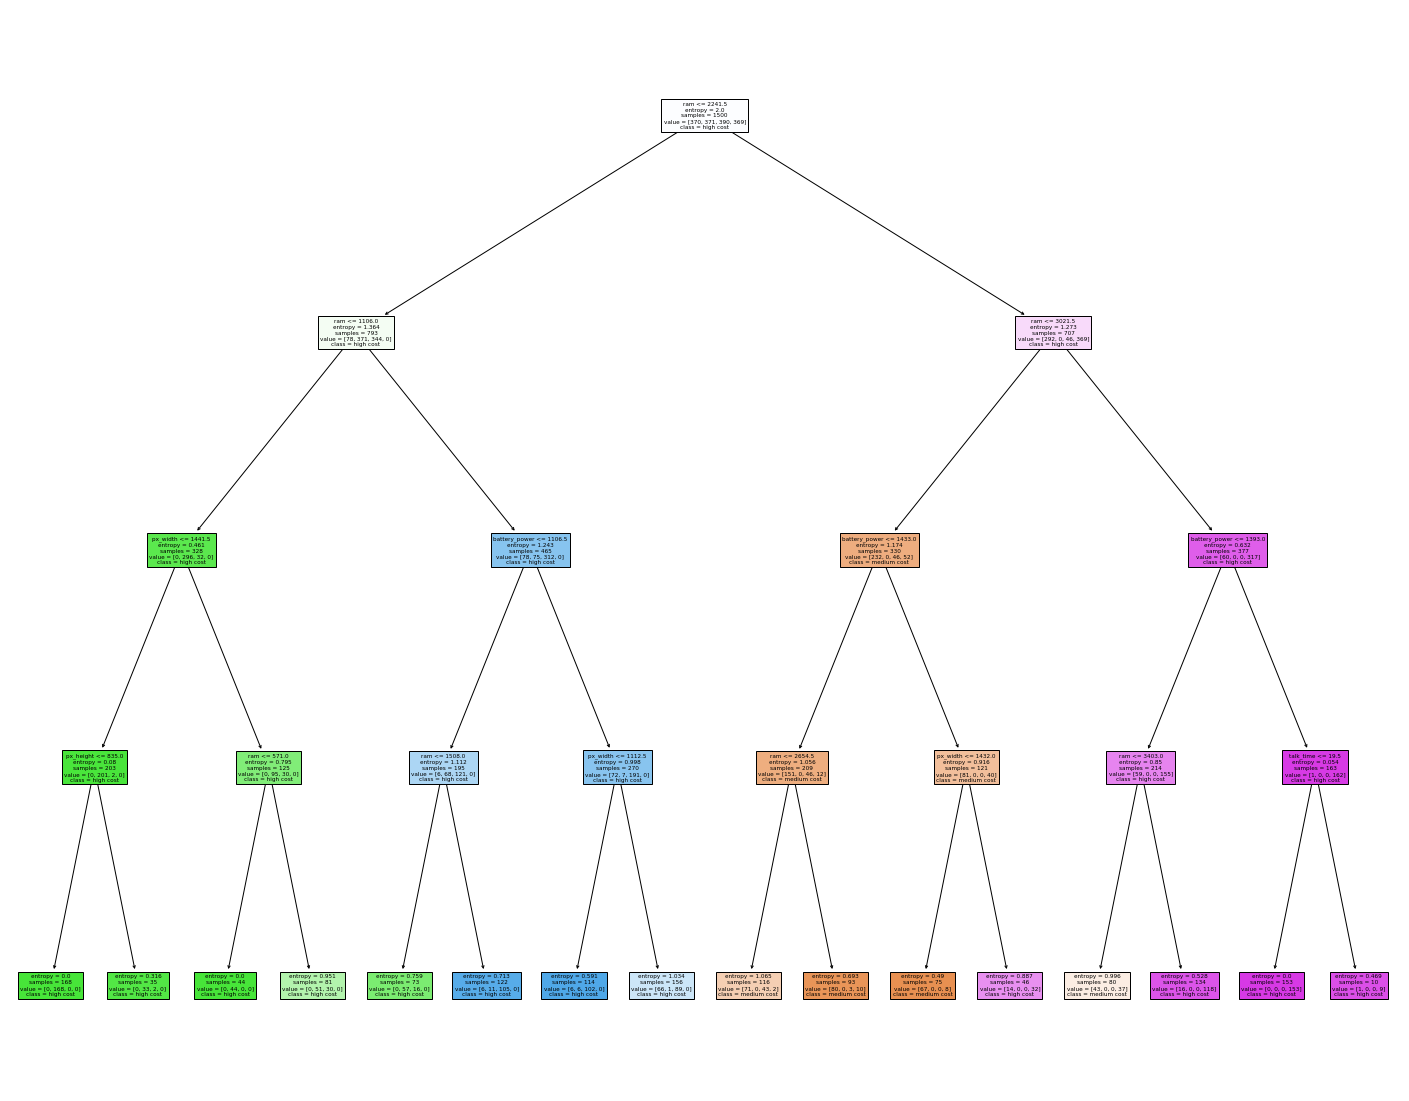

In [22]:
arbol = DecisionTreeClassifier(criterion="entropy",
                             max_depth=4,
                             min_samples_split=5,
                             random_state=0)
arbol = arbol.fit(X_train, Y_train)
fig = plt.figure(figsize=(25,20)) #Dimensiones del grafico

tree.plot_tree(arbol, feature_names=list(X.columns.values),
              class_names=list(Y.values), filled=True)
plt.show()

Feature: 0, Score: 0.09207
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00243
Feature: 12, Score: 0.05186
Feature: 13, Score: 0.85171
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00193
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000


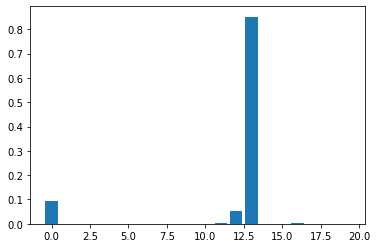

In [27]:
importances = arbol.feature_importances_
for i,v in enumerate(importances):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importances))], importances)
plt.show()

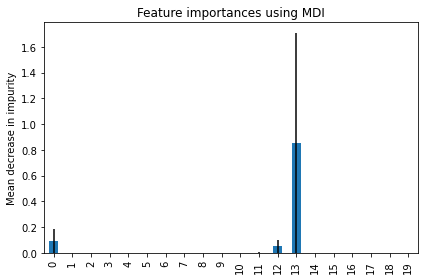

In [28]:
forest_importances = pd.Series(importances)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=importances, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

¿Cuáles son las variables más importantes y en qué orden?
    -Observando la grafica, las variables que mas importancia tienen son: ram, battery_power y px_width
¿Hay variables del conjunto de datos que no se han usado?
    -Si, hay variables que dan una importancia 0
¿Cuál sería la tasa de aciertos (accuracy) del árbol sobre el conjunto de entrenamiento si sólo hiciera una pregunta?
    -Tendria una tasa de acierto del 25%, ya que siempre diria que es high cost
¿El árbol que has calculado es capaz de separar las clases?
Si no has mostrado el árbol completo, en la parte que estás viendo, ¿qué clases se separan mejor o peor? ¿qué variables ayudan a discriminarlas?
    -Viendo los nodos del arbol, creo que las clases medium_cost y high_cost se separan mejor. La variable ram es la que mas ayuda a elegir una u otra
¿En cuál de los nodos del segundo nivel del árbol existe mayor confusión (siendo la raíz el nivel 0)?
    -En el segundo nodo del nivel 2 hay una entropia de 1.243, donde decide si battery_power <= 1106.5

## 6) Estudiando el error

Calcula la precisión, exhaustividad y valor F1 agregadas usando la profundidad óptima del árbol y validación cruzada en 10 partes. ¿Qué podemos decir sobre el funcionamiento general de nuestro clasificador?

Calcula el informe detallado para cada una de las clases y dibuja la matriz de confusión. ¿Cómo se comporta nuestro clasificador en cada una de las clases?

Finalmente, ¿cómo de fiable te parece? ¿crees que aportaría algo en una empresa real? Analiza las ventajas y desventajas de utilizar un clasificador basado en árboles de decisión en el contexto de este problema.

In [33]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict

predictions = cross_val_predict(arbol, X, Y, cv=6)

cr=classification_report(Y, predictions)
print(cr)

                precision    recall  f1-score   support

     high cost       0.69      0.67      0.68       500
      low cost       0.88      0.92      0.90       500
   medium cost       0.77      0.67      0.72       500
very high cost       0.81      0.91      0.86       500

      accuracy                           0.79      2000
     macro avg       0.79      0.79      0.79      2000
  weighted avg       0.79      0.79      0.79      2000



En la celda anterior analizamos la precisión y exhaustividad. La precisión indica cuántos casos seleccionados son relevantes, y la exhaustividad indica cuántos casos relevantes son seleccionados. 


*   Un 33% de los high cost no han sido correctamente predecido,
*   Un 8% de los low cost no han sido correctamente predecido.
*   Un 33% de los medium cost no han sido correctamente predecido,
*   Un 9% de los very high cost no han sido correctamente predecido.


El valor F es un valor único ponderado de la precisión y la exhaustividad. *Support* indica la cantidad de instancias a la que se refiere el parámetro (hay 500 de cada tipo). La exactitud (*accuracy*) es de un 79%.

## 7) **OPCIONAL**: Usando el clasificador k-NN 
Intenta resolver el mismo problema usando un clasificador k-NN. Para ello, elige las variables que consideres más relevantes para el problema, basándote principalmente en el estudio que has hecho del mismo en los apartados anteriores (o alguno adicional que hagas aquí si lo consideras adecuado). Tendrás que decidir, si escalas las variables o no, y qué valor de k consideras el más adecuado.

Analiza los resultados obtenidos y di por qué crees que suceden.
